# Risk Management Overview of the QIG Portfolio

In [ ]:
# Import relevant functions
from data.DataCollector import *
from models.Viewer import *
from stress_testing.rare_events import *

# Such that above files get loaded properly
%load_ext autoreload
%autoreload 2

import importlib
import models.Portfolio as pm
importlib.reload(pm)

# Define the tickers in our portfolio
current_portfolio = [
    "DIE.BR",      # D'Ieteren Group
    "ENR.DE",      # Siemens Energy AG
    "HEI.DE",      # Heidelberg Materials AG
    "PRX.AS",      # Prosus NV
    "UMI.BR",      # Umicore

    "AXON",        # Axon Enterprise Inc
    "EQT",         # EQT Corp
    "HOLX",        # Hologic Inc
    "PAYC",        # Paycom Software Inc
    "PLTR",        # Palantir Technologies
    "SMCI",        # Super Micro Computer
    "TPR",         # Tapestry Inc
    "UAL",         # United Airlines
    "WYNN"         # Wynn Resorts
]



# Define total amount of years T and number of paths M to simulate. We assume daily (252) returns
T, M = 1, 100000
# Define budget; currently not utilized
budget = 0
# Specify weight allocation method (equal weighted method or market cap method, ML method comes at the end)
method = "manual"

# Download the required Yahoo Finance stock data
master_data = fetch_master_data(current_portfolio)
historic_prices = fetch_history(current_portfolio, start="2015-01-01", end="2025-11-21", interval="1d")

# Estimate the historic mean and standard deviation of each stock
mu, sigma = pm.Stock.estimate_simulation_params(historic_prices)

# Make stock objects which can be added to the portfolio
assets = {}
for ticker, row in master_data.iterrows():
    assets[ticker] = pm.Stock(
            ticker = ticker,
            sector = row["sector"],
            asset_class = row["asset_class"],
            S0 = historic_prices[ticker].iloc[0],
            transaction_price = historic_prices[ticker].iloc[-1],
            current_price = row["current_price"],
            market_cap = master_data.loc[ticker, "market_cap"],
            mu = mu[ticker],          
            sigma = sigma[ticker],       
        )

print(historic_prices)

# Create portfolio object
portfolio = pm.Portfolio(budget, [assets[key] for key,_ in assets.items()])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<string>:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
<string>:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead


                DIE.BR      ENR.DE      HEI.DE     PRX.AS     UMI.BR  \
Date                                                                   
2015-01-02   16.348377         NaN   53.690916        NaN  15.193033   
2015-01-05   16.037107         NaN   51.846179        NaN  14.825167   
2015-01-06   15.799876         NaN   51.768528        NaN  14.758624   
2015-01-07   15.629109         NaN   52.071176        NaN  14.572708   
2015-01-08   15.716398         NaN   53.583797        NaN  14.788164   
...                ...         ...         ...        ...        ...   
2025-10-10  182.287156  122.604300  222.596201  68.319694  19.061498   
2025-10-13  184.594332  125.886136  225.028717  69.191318  19.712492   
2025-10-14  183.681505  122.782063  229.139210  67.757138  19.814005   
2025-10-15  181.227519  122.868085  226.766445  68.300046  20.675252   
2025-10-16  182.381447  122.635799  226.812168  68.141456  19.845338   

                  AXON        EQT       HOLX        PAYC       

<string>:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
<string>:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
<string>:34: FutureWarning: YF.download() has changed argument auto_adjust default to True


## Analyze correlation matrix


Top 3 most strongly positively correlated pairs:
WYNN  UAL    0.519921
UAL   TPR    0.484062
WYNN  TPR    0.464114
dtype: float64

Top 3 most strongly negatively correlated pairs:
HOLX  UMI.BR    0.047093
      HEI.DE    0.008743
      ENR.DE   -0.003772
dtype: float64


/Users/LaptopvanFrank/Desktop/QIG/Risk/QIG-RM/models/Viewer.py:47: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change().dropna()


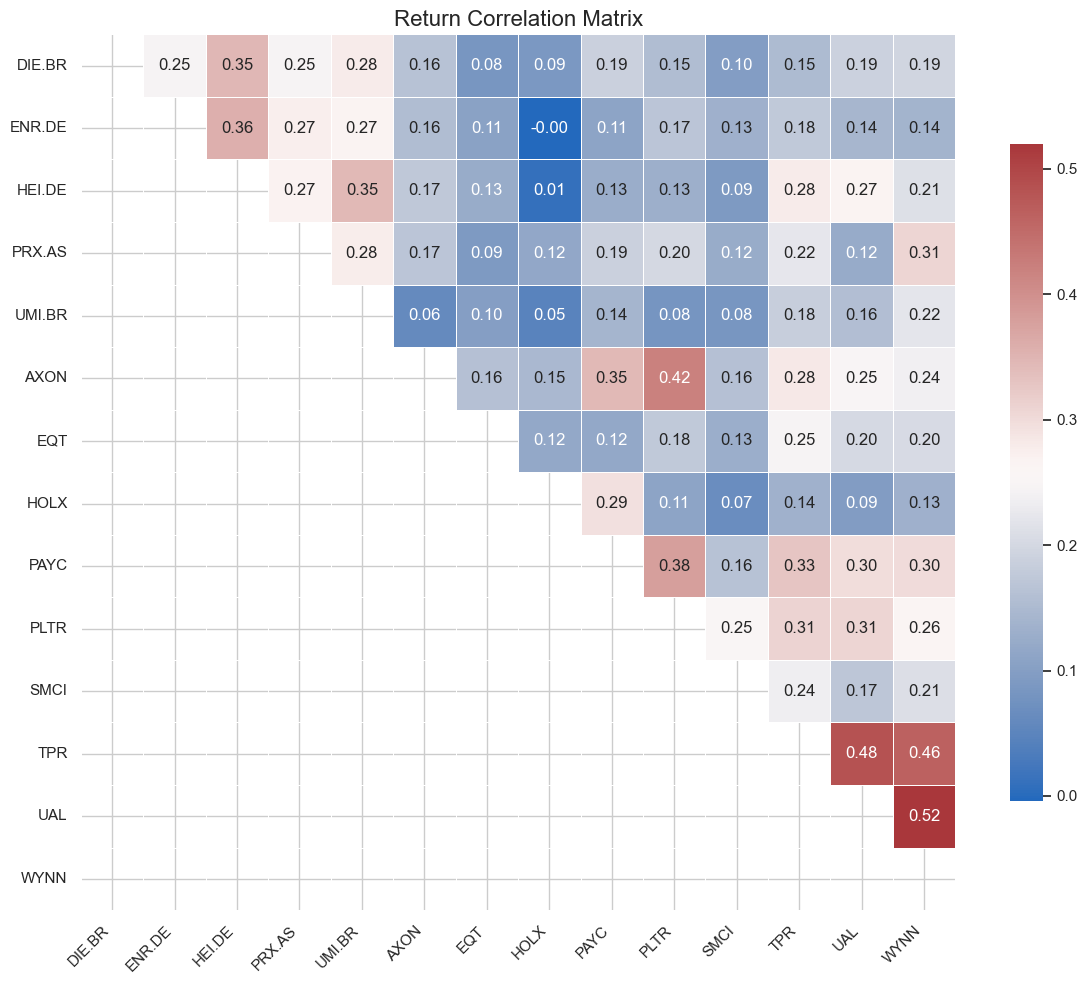

In [92]:
# Look at var-covar matrix
correlation_analysis(historic_prices)

                DIE.BR      ENR.DE      HEI.DE     PRX.AS     UMI.BR  \
Date                                                                   
2015-01-02   16.348377         NaN   53.690916        NaN  15.193033   
2015-01-05   16.037107         NaN   51.846179        NaN  14.825167   
2015-01-06   15.799876         NaN   51.768528        NaN  14.758624   
2015-01-07   15.629109         NaN   52.071176        NaN  14.572708   
2015-01-08   15.716398         NaN   53.583797        NaN  14.788164   
...                ...         ...         ...        ...        ...   
2025-10-10  182.287156  122.604300  222.596201  68.319694  19.061498   
2025-10-13  184.594332  125.886136  225.028717  69.191318  19.712492   
2025-10-14  183.681505  122.782063  229.139210  67.757138  19.814005   
2025-10-15  181.227519  122.868085  226.766445  68.300046  20.675252   
2025-10-16  182.381447  122.635799  226.812168  68.141456  19.845338   

                  AXON        EQT       HOLX        PAYC       

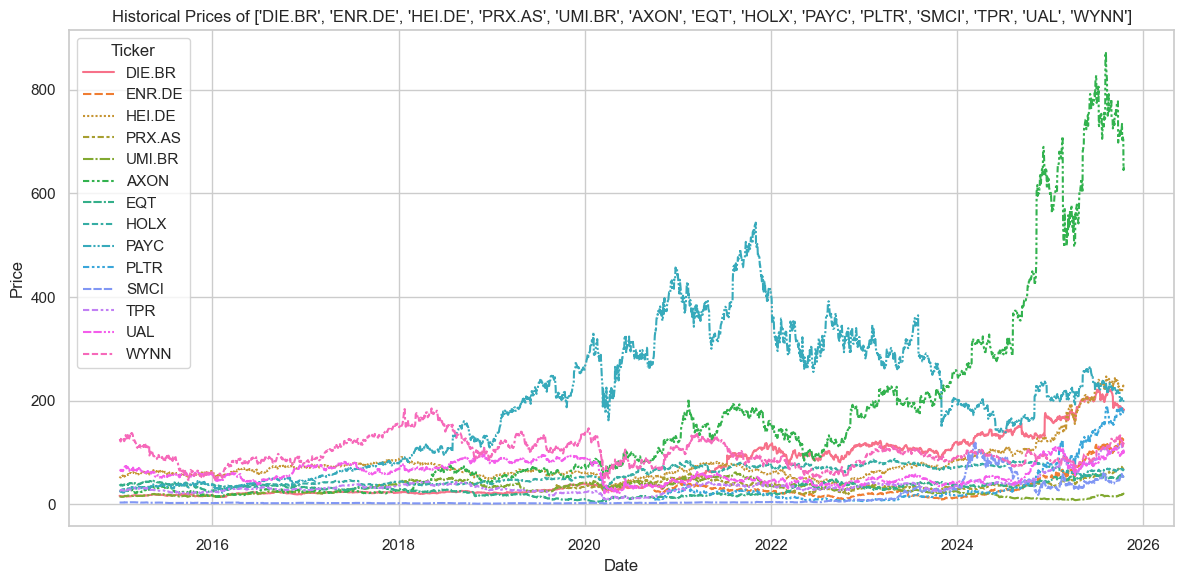

In [93]:
# Plot current - and historic prices of particular stocks on the basis of the asset tickers, assets desired to be plotted need to be in list format 
# If user wants to see historic prices in terminal, set show_prices = True
stocks_to_fetch = current_portfolio # For example index 0 and 1
plot_historical_prices(historic_prices, stocks_to_fetch, show_prices = True)

In [95]:
# Calculate corresponding portfolio weights using a specified method 
weights = portfolio.asset_allocation(method)

df = portfolio.display_portfolio(weights, method) # Automatically prints portfolio info



=========== Current Portfolio Characteristics on 21-11-2025 ===========

Portfolio Value after Purchase in USD: $7,170.30

Portfolio Value currently in USD: $6,637.73

                   sector asset class  quantity  purchase price   weight  \
DIE.BR  Consumer Cyclical      EQUITY    2.5990      182.381447   2.5990   
ENR.DE        Industrials      EQUITY    3.7632      122.635799   3.7632   
HEI.DE    Basic Materials      EQUITY    1.8535      226.812168   1.8535   
PRX.AS  Consumer Cyclical      EQUITY    6.3816       68.141456   6.3816   
UMI.BR        Industrials      EQUITY   23.1614       19.845338  23.1614   
AXON          Industrials      EQUITY    0.8590      652.169983   0.8590   
EQT                Energy      EQUITY    7.6303       53.082710   7.6303   
HOLX           Healthcare      EQUITY    6.0720       68.500000   6.0720   
PAYC           Technology      EQUITY    2.4376      200.490005   2.4376   
PLTR           Technology      EQUITY    2.5795      178.119995   2.579


## Simulate Portfolio paths over a **one-month** horizon using a GBM; calculate VaR and CVaR.

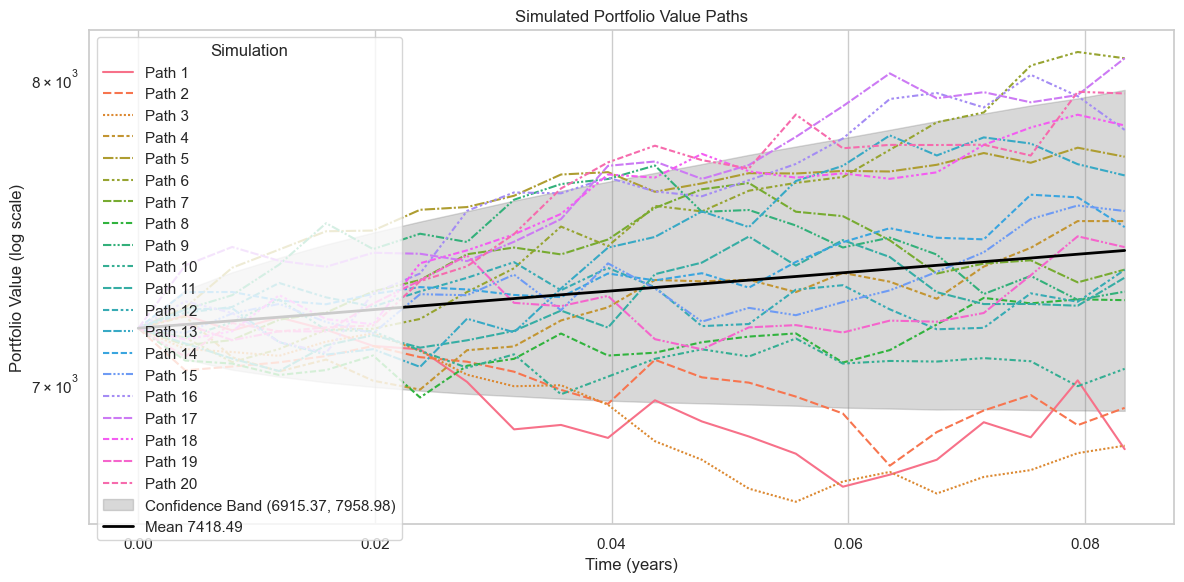

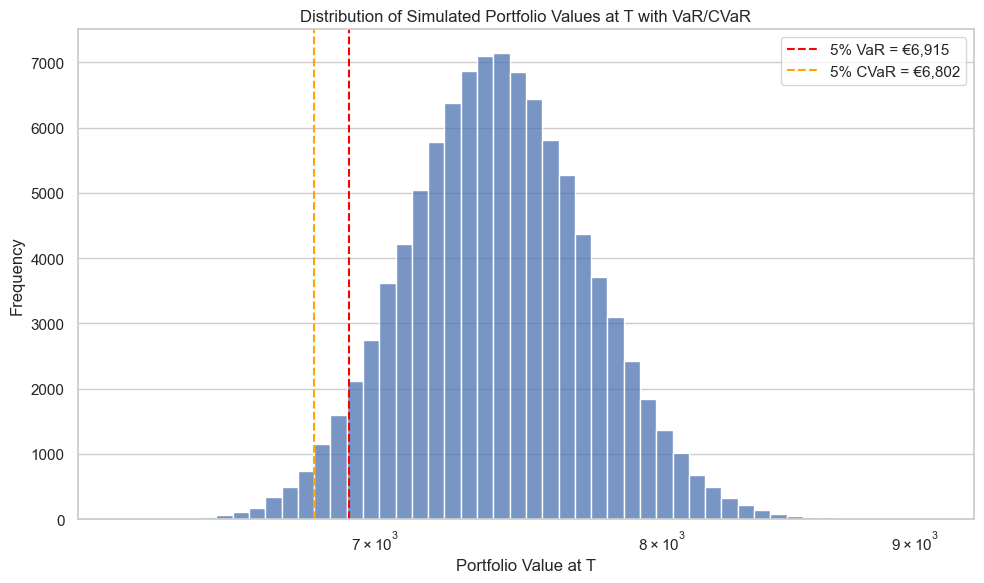

In [96]:
# Simulate 100.000 portfolio paths and plot a number of the trajectories which can be specified by n_paths, for 1 month
T=1/12
t, port_paths = portfolio.simulate_portfolio_GBM(df, T, M)

# Trajectories are plotted in log-scale on y-axis because paths can explode
n_paths_to_plot = 20
plot_portfolio_trajectories(t, port_paths, n_paths = n_paths_to_plot)

# Demonstrate the impact of risk and uncertainty, plots distribution of terminal portfolio values including VaR/CVaR
histogram_uncertainty(port_paths)

## Simulate Portfolio paths over a **one-month** horizon using a CorrelatedGBM by means of Cholesky decomposition; calculate VaR and CVaR.

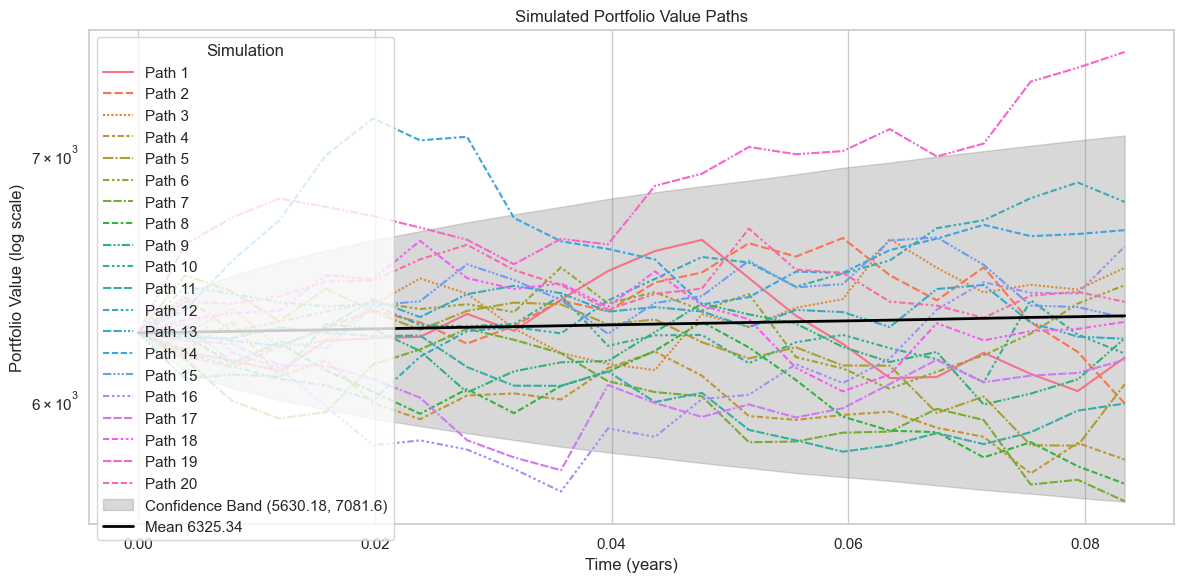

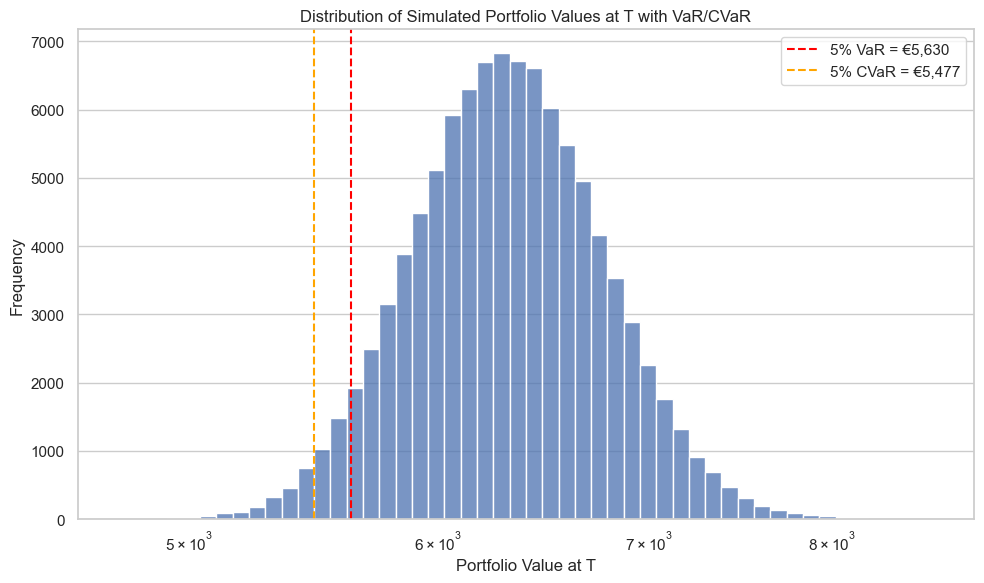

In [32]:
t, port_paths = portfolio.simulate_portfolio_GBM_correlated(df, historic_prices, T=1/12, M=100000, N=252)

# Trajectories are plotted in log-scale on y-axis because paths can explode
n_paths_to_plot = 20
plot_portfolio_trajectories(t, port_paths, n_paths = n_paths_to_plot)

# Demonstrate the impact of risk and uncertainty, plots distribution of terminal portfolio values including VaR/CVaR
histogram_uncertainty(port_paths)

## Simulate Portfolio paths over a **one-month** horizon using a GARCH(1,1) model; calculate VaR and CVaR.

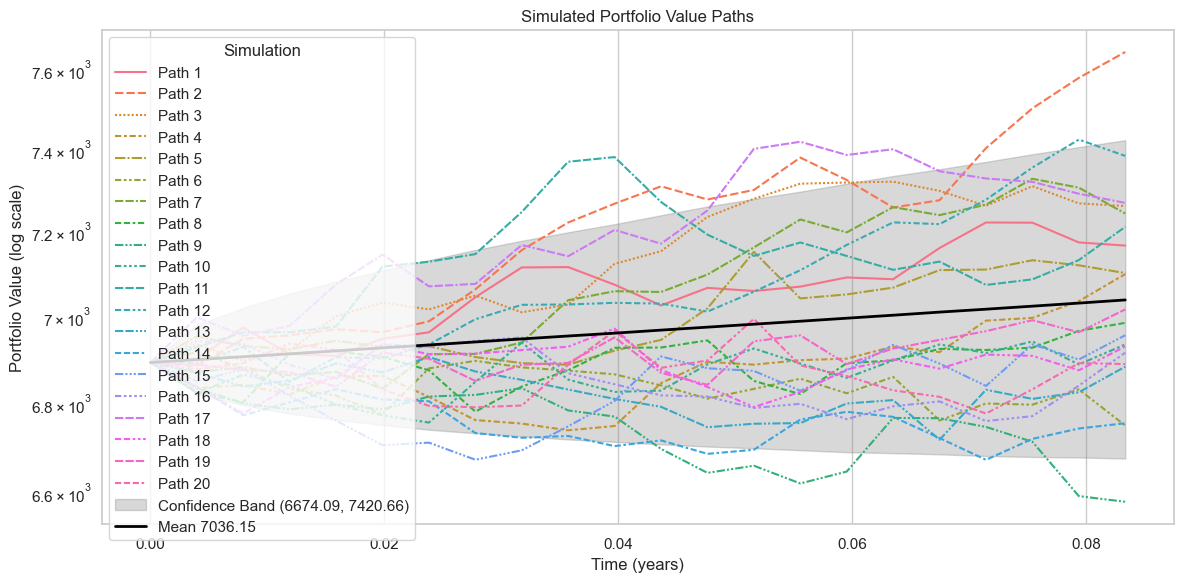

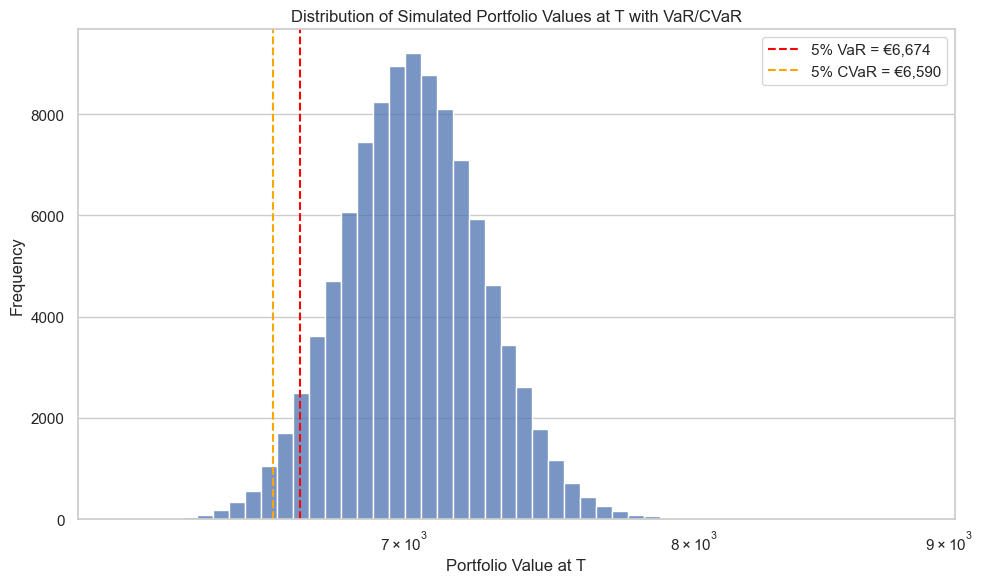

In [17]:
t, port_paths = portfolio.simulate_portfolio_GARCH11(df, historic_prices, T=1/12, M=100000, N=252)

# Trajectories are plotted in log-scale on y-axis because paths can explode
n_paths_to_plot = 20
plot_portfolio_trajectories(t, port_paths, n_paths = n_paths_to_plot)

# Demonstrate the impact of risk and uncertainty, plots distribution of terminal portfolio values including VaR/CVaR
histogram_uncertainty(port_paths)